<a href="https://colab.research.google.com/github/Abishethvarman/FakeNewsDetection/blob/main/topic_modelling_fakenews_LDA_10topics%2Bvisualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install wordcloud pyLDAvis

In [2]:
import pyLDAvis
# import pyLDAvis.sklearn
import pandas as pd
import nltk
import torch
import numpy as np
import matplotlib.pyplot as plt
import string
import pyLDAvis
import pyLDAvis.lda_model
from gensim.corpora import Dictionary
from sklearn.manifold import TSNE
import os
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping c

True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

%cd /mydrive/dataset/

In [4]:
data = pd.read_csv("Fake.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Preprocessing
def preprocess_text(text):
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = ["more", "good", "one", "two","via","also","like"]
    stop_words.update(custom_stopwords)

    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]


    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Reconstruct text
    processed_text = ' '.join(tokens)
    return processed_text



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Apply preprocessing to your dataset
data['processed_text'] = data['text'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Feature extraction - CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the text data
X = vectorizer.fit_transform(data['processed_text'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Apply LDA
num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topic_matrix = lda_model.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    # top_words = [vectorizer.get_feature_names()[i] for i in top_words_idx]
    print(f"Topic {topic_idx}:")
    print(top_words)


Topic 0:
['people', 'know', 'get', 'would', 'think', 'want', 'say', 'thing', 'going', 'image']
Topic 1:
['black', 'vote', 'people', 'voter', 'white', 'election', 'january', 'trump', 'flag', 'said']
Topic 2:
['trump', 'donald', 'president', 'said', 'image', 'white', 'people', 'realdonaldtrump', 'time', 'would']
Topic 3:
['state', 'american', 'government', 'country', 'obama', 'united', 'would', 'year', 'world', 'war']
Topic 4:
['news', 'medium', 'story', 'fox', 'cnn', 'fake', 'time', 'post', 'new', 'report']
Topic 5:
['republican', 'president', 'obama', 'party', 'would', 'state', 'democrat', 'trump', 'court', 'cruz']
Topic 6:
['woman', 'sexual', 'girl', 'room', 'abortion', 'men', 'show', 'child', 'hollywood', 'sex']
Topic 7:
['fbi', 'russian', 'russia', 'clinton', 'email', 'investigation', 'said', 'intelligence', 'state', 'information']
Topic 8:
['police', 'said', 'gun', 'people', 'school', 'officer', 'student', 'black', 'city', 'law']
Topic 9:
['clinton', 'hillary', 'campaign', 'sander'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


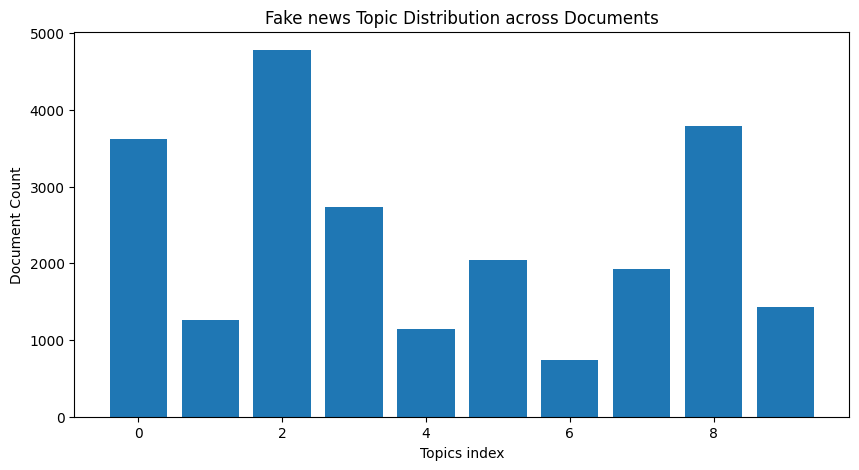

In [11]:
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution)

plt.figure(figsize=(10, 5))
plt.bar(range(len(topic_counts)), topic_counts)
plt.xlabel('Topics index')
plt.ylabel('Document Count')
plt.title('Fake news Topic Distribution across Documents')
plt.show()

In [ ]:
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
import plotly.express as px

num_words = 100

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    word_importance = np.exp(topic[top_words_idx])

    # Create an interactive bar plot using Plotly
    fig = px.bar(x=word_importance, y=top_words, orientation='h', title=f"Topic {topic_idx} - Most Important Fake News Key Words")
    fig.update_layout(xaxis_title="Word Importance", yaxis_title="Words")
    fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-eb48405559dc>:8: RuntimeWarning: overflow encountered in exp
  word_importance = np.exp(topic[top_words_idx])


<ipython-input-12-eb48405559dc>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-12-eb48405559dc>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-12-eb48405559dc>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-12-eb48405559dc>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-12-eb48405559dc>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-12-eb48405559dc>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-12-eb48405559dc>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-12-eb48405559dc>:8: RuntimeWarning:

overflow encountered in exp



<ipython-input-12-eb48405559dc>:8: RuntimeWarning:

overflow encountered in exp



In [13]:
num_words = 10  # Number of most used words to display

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    word_importance = np.exp(topic[top_words_idx])

    # Create an interactive bar plot using Plotly
    fig = px.bar(x=word_importance, y=top_words, orientation='h', title=f"Topic {topic_idx} - Most Used Words in Fake News")

    # Add color and hover data
    fig.update_traces(marker_color='blue', hovertemplate='%{x:.2f}', hoverinfo='x+y')

    # Add annotations for the highest word importance
    max_importance = max(word_importance)
    max_idx = word_importance.argmax()
    fig.add_annotation(x=max_importance, y=top_words[max_idx], text=f'Max Importance: {max_importance:.2f}', showarrow=True)

    # Customize layout
    fig.update_layout(
        xaxis_title="Word Importance",
        yaxis_title="Words",
        font=dict(family="Arial", size=12),
        title_font=dict(size=16),
        plot_bgcolor='white'
    )

    fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-13-989ef0cd3d6a>:6: RuntimeWarning:

overflow encountered in exp



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



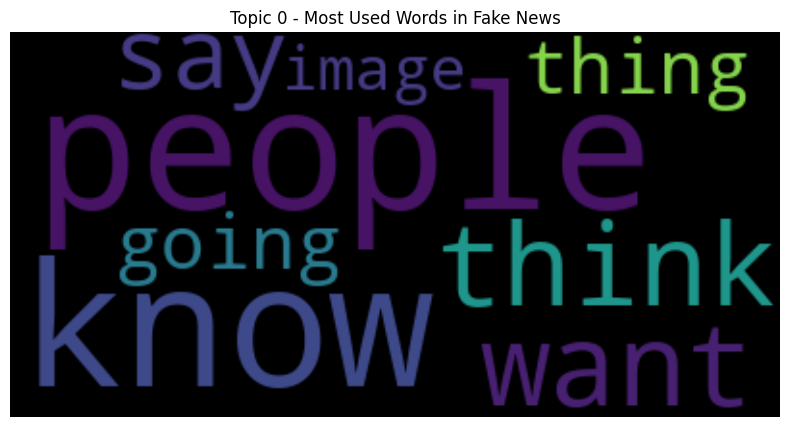

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



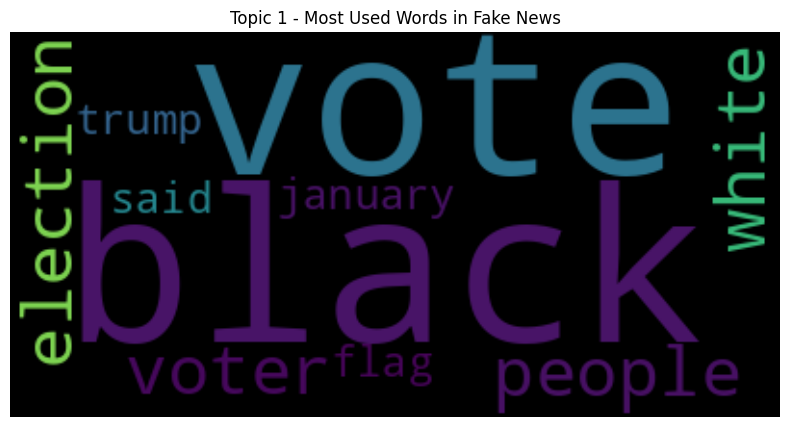

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



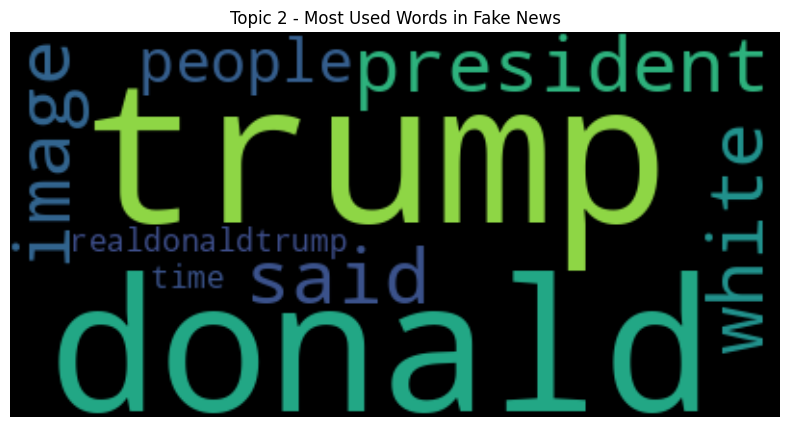

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



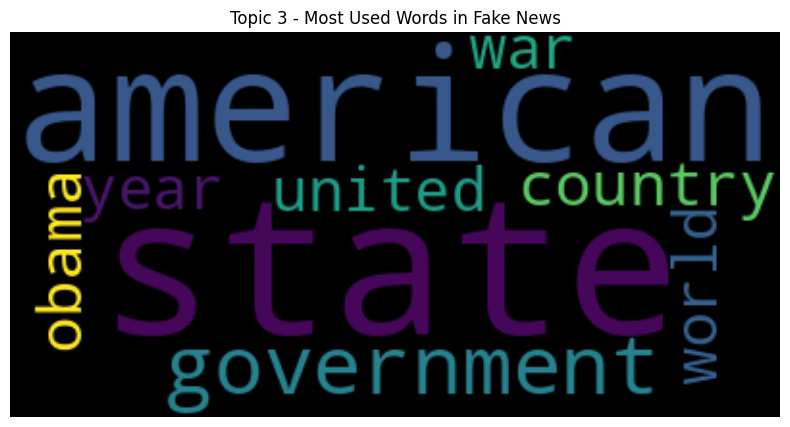

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



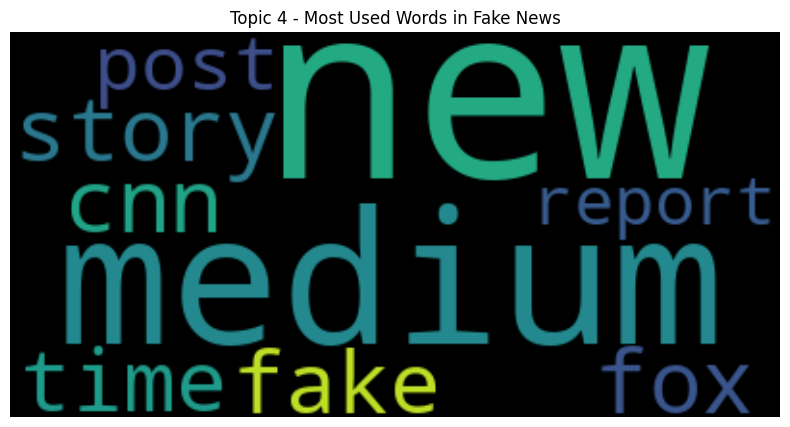

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



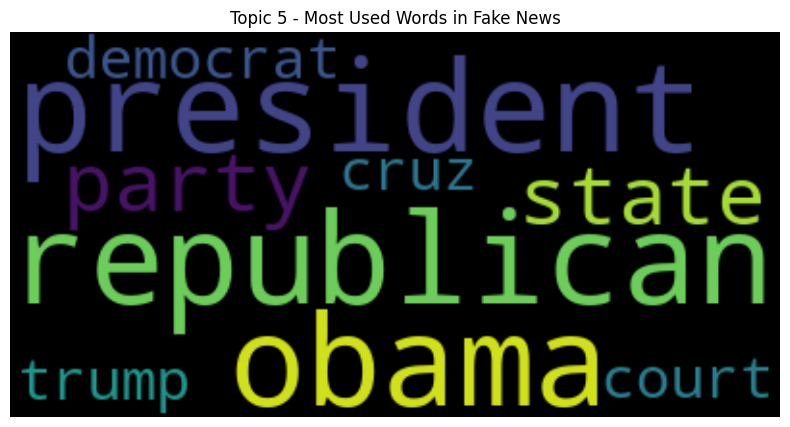

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



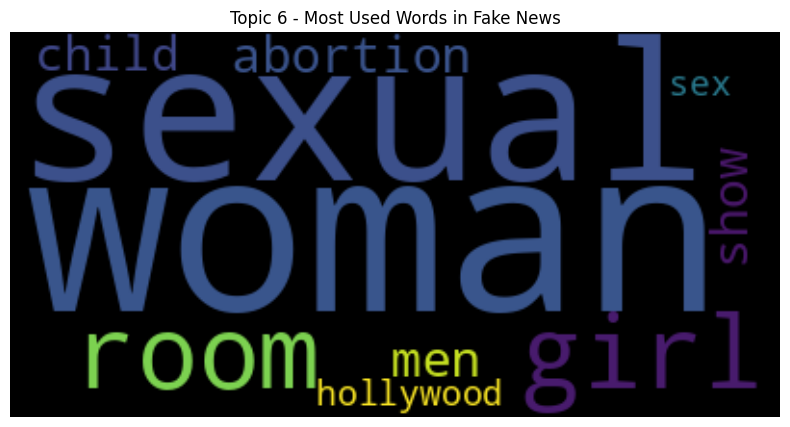

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



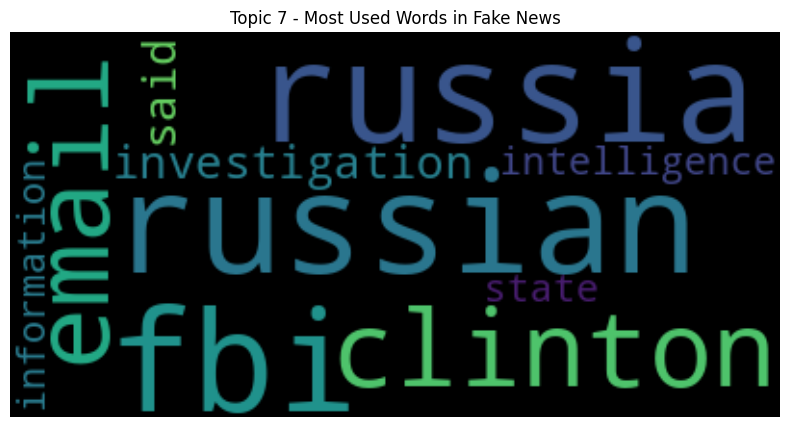

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



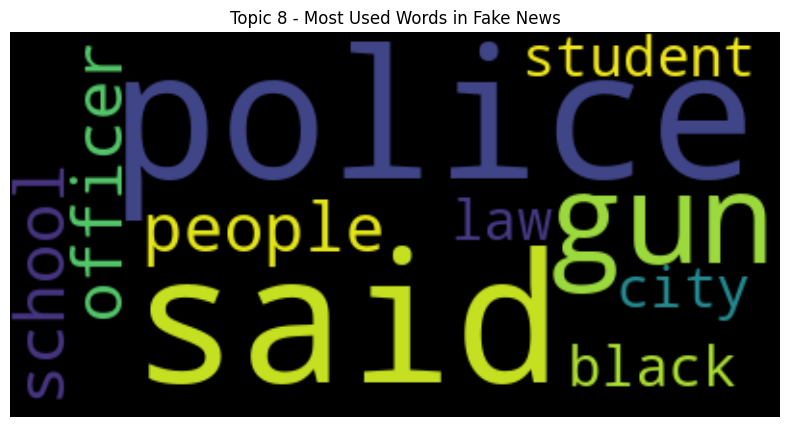

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



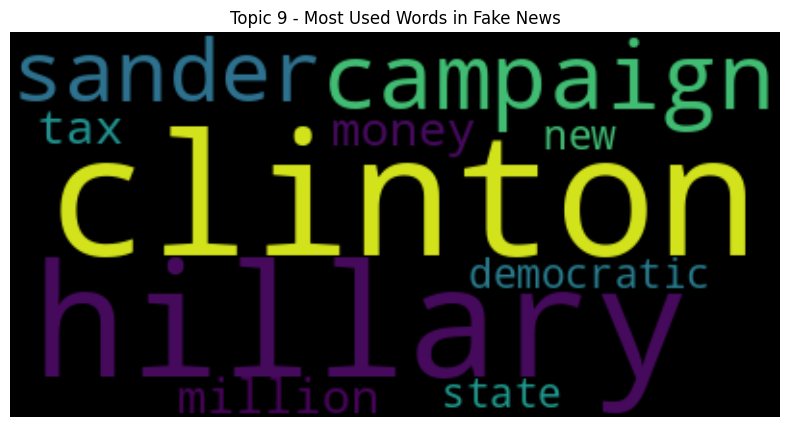

In [14]:
# Iterate through each topic
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words = ' '.join(top_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='black').generate(topic_words)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_idx} - Most Used Words in Fake News")
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(-1.0999983955057837,
 1.0999999073946276,
 -1.0999911003529352,
 1.0999995717470115)

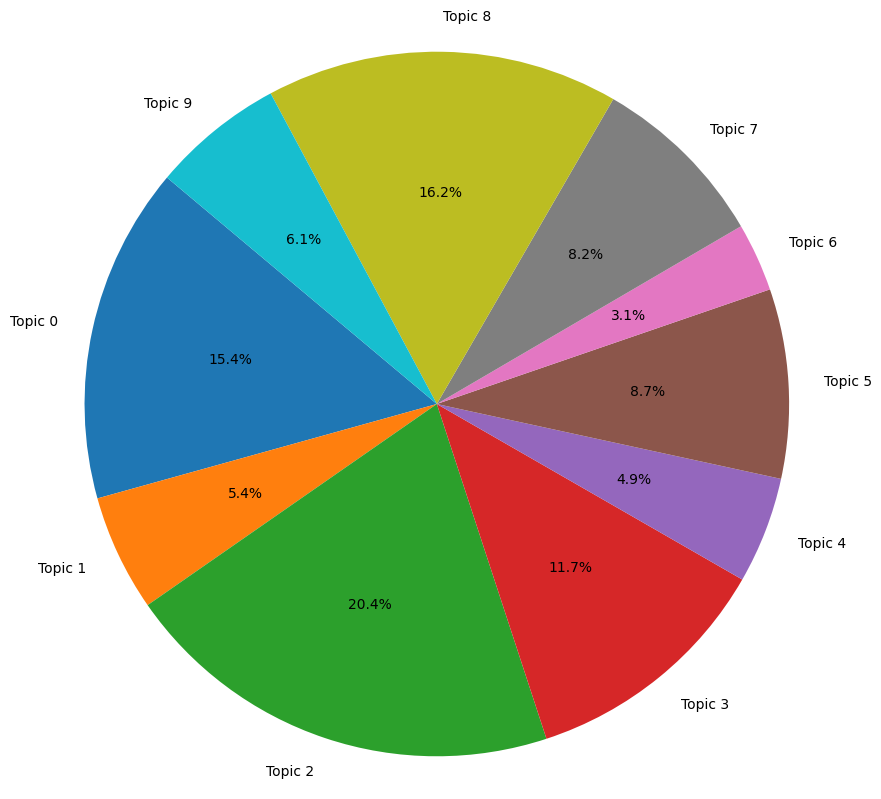

In [15]:
total_documents = len(data)
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution, minlength=num_topics)

plt.figure(figsize=(10, 10))
plt.pie(topic_counts, labels=[f"Topic {i}" for i in range(num_topics)], autopct="%1.1f%%", startangle=140)
plt.axis("equal")  # Equal aspect

In [16]:
processed_text = data['processed_text'].apply(lambda x: x.split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [17]:
dictionary = Dictionary(processed_text)
corpus = [dictionary.doc2bow(text) for text in processed_text]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [18]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda_model, X, vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [19]:
# Save the visualization as an HTML file
output_html_path = "lda_visualization_fake_news_10.html"
pyLDAvis.save_html(vis, output_html_path)

# Display a success message
print(f"Visualization saved as {output_html_path}")

Visualization saved as lda_visualization_fake_news_10.html


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



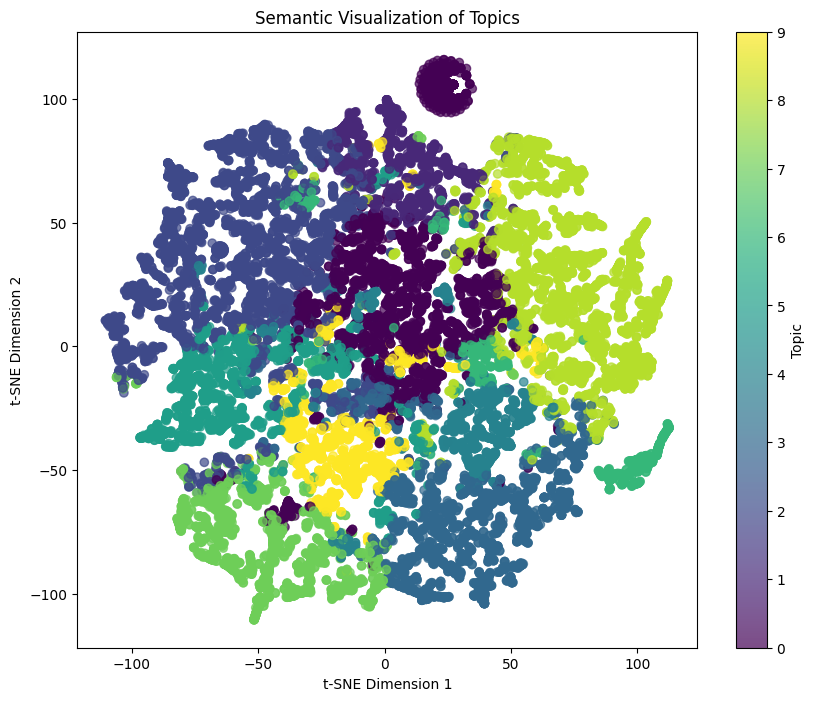

In [20]:
tsne = TSNE(n_components=2, random_state=42)
tsne_topics = tsne.fit_transform(topic_matrix)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_topics[:, 0], tsne_topics[:, 1], c=topic_distribution, cmap='viridis', alpha=0.7)
plt.colorbar(label='Topic')
plt.title('Semantic Visualization of Topics')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



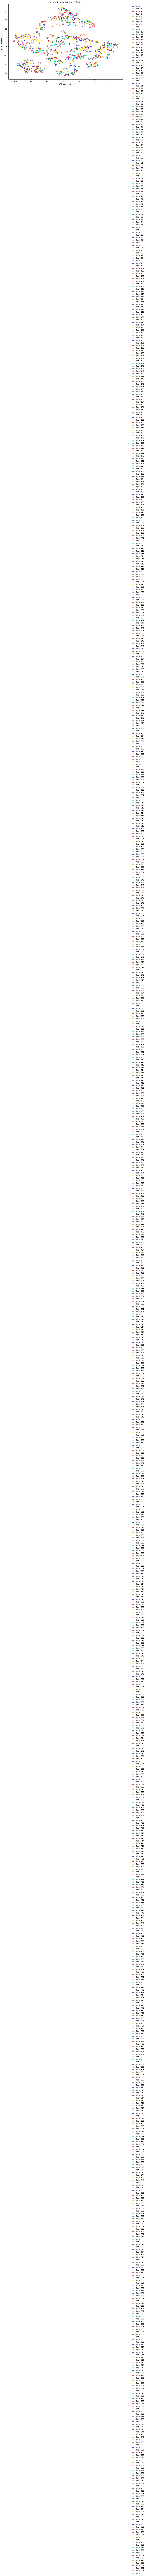

In [28]:
# Subset of topic_matrix for visualization
num_samples = 1000

subset_topic_matrix = topic_matrix[:num_samples]

# Fit t-SNE to subset_topic_matrix
tsne = TSNE(n_components=2, random_state=42)
tsne_topics = tsne.fit_transform(subset_topic_matrix)

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed

# Define a list of colors for each topic
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'grey', 'cyan']

# Scatter plot with labels for each topic
for topic_idx, (x, y) in enumerate(tsne_topics):
    plt.scatter(x, y, color=colors[topic_idx % len(colors)], label=f"Topic {topic_idx}", alpha=0.7)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Semantic Visualization of Topics for 1000 samples')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
